<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Иван, доброго дня! рад приветствовать тебя! <br />
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы. Да и вообще - всячески доставать меня:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
В ПУТЬ!<br>

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib as plt
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

загрузим данные:

In [2]:
train = pd.read_csv('./datasets/gold_recovery_train.csv',index_col='date',parse_dates=['date'])
test = pd.read_csv('./datasets/gold_recovery_test.csv',index_col='date',parse_dates=['date'])
full=pd.read_csv('./datasets/gold_recovery_full.csv',index_col='date',parse_dates=['date'])

In [ ]:
train = pd.read_csv('/datasets/gold_recovery_train.csv',index_col='date',parse_dates=['date'])
test = pd.read_csv('/datasets/gold_recovery_test.csv',index_col='date',parse_dates=['date'])
full=pd.read_csv('/datasets/gold_recovery_full.csv',index_col='date',parse_dates=['date'])

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
данные на базе) 

создадим список датасетов для последующей циклической обработки:

In [3]:
datasets=(train,test,full)

получим общую информацию о наших данных -инфо о датасете, статистику, наличие дубликатов:

In [4]:
for dataset in datasets:
    print(dataset.info())
   

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

In [5]:
test.sample()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2017-09-18 20:59:59,222.88705,8.484979,6.993333,1.590943,1600.233291,-506.093578,1602.373394,-502.684105,1600.899247,-491.209285,...,11.978771,-501.52445,8.981303,-402.730518,9.050963,-499.26429,7.106624,-499.747566,9.988573,-500.726731


In [6]:
train.sample()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-20 07:00:00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,...,13.882692,-797.386232,12.076171,-622.259528,10.047888,-500.385487,7.991298,-499.929725,11.929865,-600.684585


In [7]:
full.sample()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-11-09 14:59:59,5.493552,7.06483,12.355469,47.487016,61.917315,9.131593,1.968316,12.333529,3.482335,166.084664,...,15.993383,-498.201824,14.012756,-498.960567,15.261184,-499.408797,14.022743,-500.203042,22.012903,-499.933384


In [8]:
train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [9]:
test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [10]:
full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


проверим данные на отсутствие дубликатов:

In [11]:
for dataset in datasets:
    print(dataset.duplicated().sum(),'\n')

16 

6 

22 



__Проверка эффективности обогащения для данных тренировочной выборки__

для проведения проверочного рассчета сделаем новый датафрейм,удалив пропущенные значения:

In [12]:
mae_calc = train.dropna()


определим необходимые параметры для расчета обогащения:

In [13]:
C = mae_calc.loc[:, ('rougher.output.concentrate_au')]
F = mae_calc.loc[:, ('rougher.input.feed_au')]
T = mae_calc.loc[:, ('rougher.output.tail_au')]

произведем расчет и поместим результаты в новый столбец:

In [14]:
mae_calc['rougher.output.recovery_test'] = (C * (F - T)) / (F * (C - T)) * 100

Расчитаем MAE (среднюю абсолютную ошибку) и средние значения для рассчитанного и фактического содержания золота

In [15]:
recovery_MAE = (
    mean_absolute_error(mae_calc.loc[:, ('rougher.output.recovery_test')], 
                       mae_calc.loc[:, ('rougher.output.recovery')])
)

print('Среднее проверочное:', mae_calc.loc[:, ('rougher.output.recovery_test')].mean())
print('Среднее рассчитанное:', mae_calc.loc[:, ('rougher.output.recovery')].mean())
print('MAE:', recovery_MAE)

Среднее проверочное: 82.7418884610155
Среднее рассчитанное: 82.7418884610155
MAE: 9.555596961987514e-15


<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
отлично! есть контакт) 

Средние значения для данных полученных при перепроверке и расчетных в таблице значений практически равны, MAE близко к нулевому значению. Эффективность обогащения рассчитана верно.

__Анализ признаков  недоступных в тестовой выборке__

получим списки колонок в сравниваемых датафреймах:

In [16]:
train_cols = train.columns
test_cols = test.columns

получим и выведем названия столбцов, которых нет в тестовом датафрейме:

In [17]:
train_not_test = train_cols.difference(test_cols)
train_not_test

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
да, здорово)

В тестовой выборке отсутсвуют следующие параметры:
- параметры продукта
- расчётные характеристики
- финальные характеристики

В тестовой выборке нет параметров характеризующих сырье. Также в тестовом наборе нет целевых признаков-эффективности обогащения чернового концентрата 'rougher.output.recovery'и эффективность обогащения финального концентрата final.output.recovery.

__Предобработка данных__

удалим дубликаты:

In [18]:
for dataset in datasets:
    dataset=dataset.drop_duplicates()
    print( dataset.duplicated().sum())

0
0
0


Заменим Nan на ближайшее значение:

In [19]:
for dataset in datasets:
    dataset=dataset.fillna(method = 'ffill',inplace=True)
 

### Выводы
- датасеты представленные для анализа содержат пропущенные, значения и дубликаты
- тестовые данные не содержат ряд колонок, включая значения целевых признаков.
- в ходе предобработки были удалены дубликаты и заполнены пропущенные значения ближайшими.
- подтверждена корректность расчета эффективности обогащения
- Подготовка данных для обучения моделей будет произведена позднее.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
хороший раздел получился)

# 2. Анализ данных

Проанализируем изменение концентраций металлов (Au, Ag, Pb) на различных этапах очистки.
Для наглядности покажем распределение концентраций с помощбю графика плотности

для серебра:

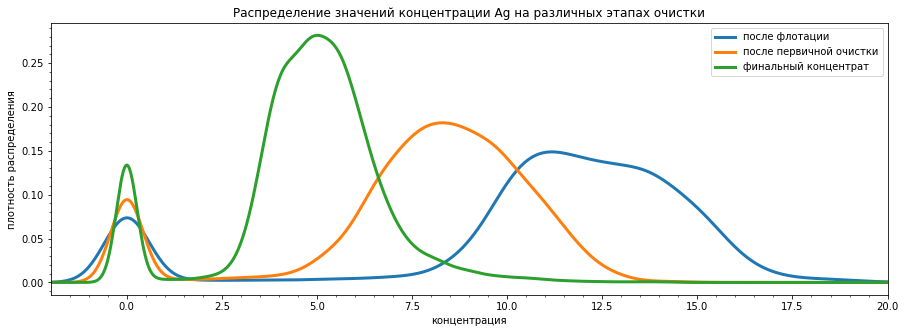

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
full['rougher.output.concentrate_ag'].plot(kind ='kde', figsize = (15,5), linewidth = 3, label='после флотации')
full['primary_cleaner.output.concentrate_ag'].plot(kind ='kde', linewidth = 3, label='после первичной очистки')
full['final.output.concentrate_ag'].plot(kind ='kde', linewidth = 3, label='финальный концентрат')
ax.minorticks_on()
plt.legend()
plt.xlim(-2,20)
plt.xlabel("концентрация")
plt.ylabel("плотность распределения")
plt.title('Распределение значений концентрации Ag на различных этапах очистки')
plt.show()

для свинца

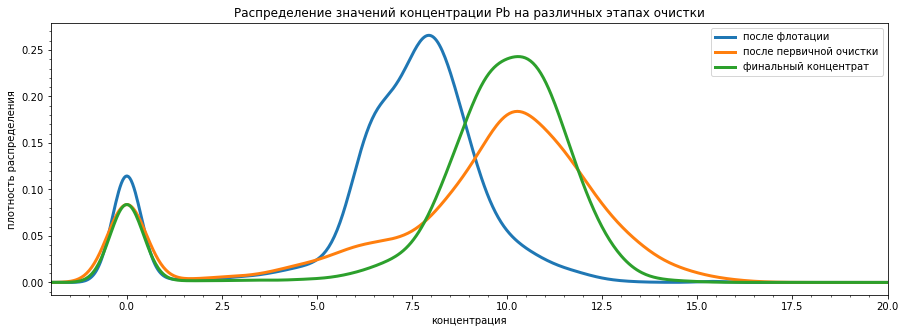

In [21]:
fig, ax = plt.subplots()
full['rougher.output.concentrate_pb'].plot(kind ='kde', figsize = (15,5), linewidth = 3, label='после флотации')
full['primary_cleaner.output.concentrate_pb'].plot(kind ='kde', linewidth = 3, label='после первичной очистки')
full['final.output.concentrate_pb'].plot(kind ='kde', linewidth = 3, label='финальный концентрат')
ax.minorticks_on()
plt.legend()
plt.xlim(-2,20)
plt.xlabel("концентрация")
plt.ylabel("плотность распределения")
plt.title('Распределение значений концентрации Pb на различных этапах очистки')
plt.show()

для золота:

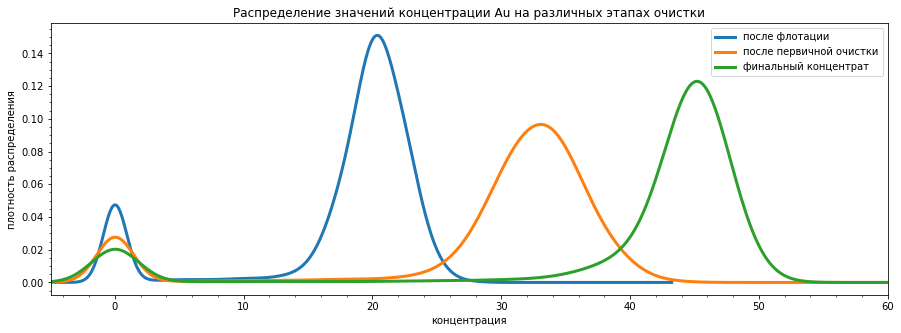

In [22]:
fig, ax = plt.subplots()
full['rougher.output.concentrate_au'].plot(kind ='kde', figsize = (15,5), linewidth = 3, label='после флотации')
full['primary_cleaner.output.concentrate_au'].plot(kind ='kde', linewidth = 3, label='после первичной очистки')
full['final.output.concentrate_au'].plot(kind ='kde', linewidth = 3, label='финальный концентрат')
ax.minorticks_on()
plt.legend()
plt.xlim(-5,60)
plt.xlabel("концентрация")
plt.ylabel("плотность распределения")
plt.title('Распределение значений концентрации Au на различных этапах очистки')
plt.show()

Концентрация серебра уменьшается почти в два раза к завершению технологического процесса. Доля свинца незначительно увеличивается. Концентрация золота растет от стадии к стадии и финальные значение практически в два с половины раза выше чем исходные концентрация. Для всех металлов наблюдается некоторое количество значений концентрации около нулево отметки. Эти значения можно интерпретировать как неполные данные или инструментальную ошибки.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
понятный графический анализ! Ок с выводами)

__Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках__

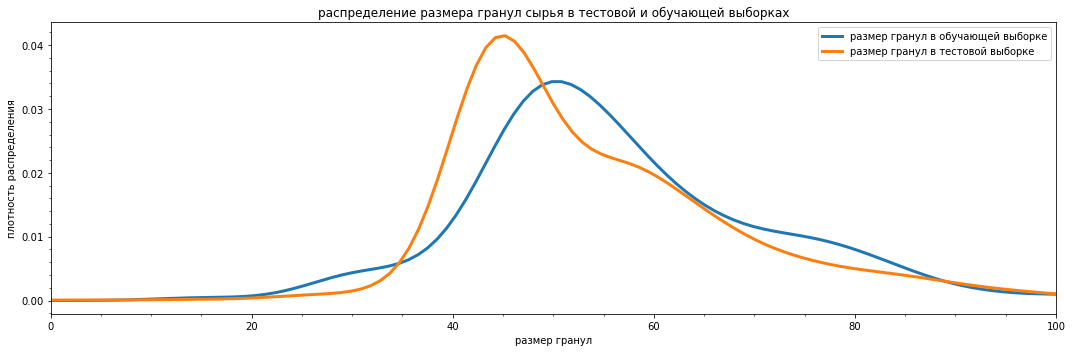

In [23]:
fig, ax = plt.subplots()
x = train['rougher.input.feed_size']
x.plot(kind = 'kde', figsize = (15,5), linewidth = 3, label = 'размер гранул в обучающей выборке')
y = test['rougher.input.feed_size']
y.plot(kind = 'kde', linewidth = 3,label = 'размер гранул в тестовой выборке')
ax.minorticks_on()

plt.legend()
plt.xlim(0,100)
plt.xlabel("размер гранул")
plt.ylabel("плотность распределения")
plt.title("распределение размера гранул сырья в тестовой и обучающей выборках")
plt.tight_layout()
plt.show();

Можно сделать заключение,что распределение размеров гранул в тестовой и обучающей выборках примерно одинаково.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
принято)

__Изменение суммарной концентрации металлов на различных стадиях технологического процесса__

Для графического представления зависимости концентрации от стадии подготовим источники данных.
Объединим в новых датфреймах соответсвущие столбцы:

In [24]:
final=full[['final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_ag']]
primary=full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_ag']]
rougher=full[['rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_ag']]

просуммируем их для получения итоговых значений:

In [25]:
rougher_total=rougher.sum(axis=1)
primary_total=primary.sum(axis=1)
final_total=final.sum(axis=1)

и построим график:

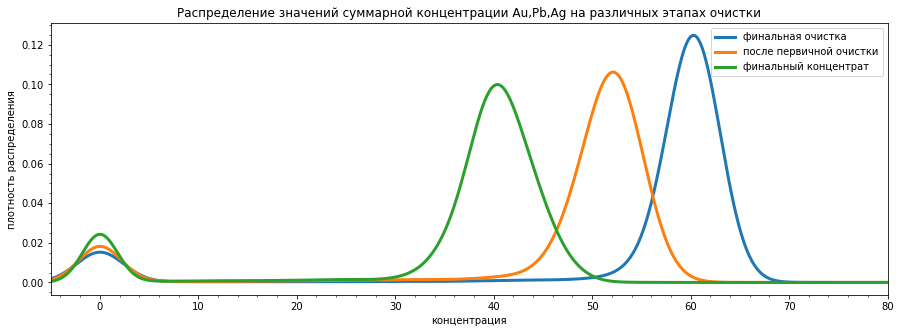

In [26]:
fig, ax = plt.subplots()
final_total.plot(kind ='kde', figsize = (15,5), linewidth = 3, label='финальная очистка')
primary_total.plot(kind ='kde', linewidth = 3, label='после первичной очистки')
rougher_total.plot(kind ='kde', linewidth = 3, label='финальный концентрат')

ax.minorticks_on()
plt.legend()
plt.xlim(-5,80)
plt.xlabel("концентрация")
plt.ylabel("плотность распределения")
plt.title('Распределение значений суммарной концентрации Au,Pb,Ag на различных этапах очистки')
plt.show()

Суммарная концентрация металлов повышается в течении процесса обогащения. Заметная доля аномальных(нулевых значений) вероятно происходит от отсутствия данных от датчиков на текущий момент времени. 

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='orange'>
В целом работа по удалению выбросов - ОК. здорово вышло<br>

В некоторых проектах - это важно, избавиться от выбросов<br>

А вот если обратиться к нашему проекту:<br>
1) Есть нулевые аномалии - и их надо "убить" это точно: просто зачем нам нулевые измерения.<br>
    
2)А вот с выбросами как в приниципе..<br>
Тут на обсуждение: наша цель - предсказывать модель на реальных данных. И вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.<br>
    
Кстати<br>
если говорить о теории выбросов, то вот это интервал q3+-1.5*iqr говорит действильно о них самых<br>
Но нет рекоммендаций к их удалению. Говорят так "на усмотрение бизнеса".<br>
А вот если взять вот этот интервал q3+3*iqr:  то тут уж с очень высокой вероятность можно говорить о грубых выбросах.

# 3. Модель

__Подготовка выборок для обучения и тестирования__

Выделим целевые и зависимые признаки в обучающей выборке:

In [27]:
features_train = train.drop(['rougher.output.recovery' , 'final.output.recovery'], axis=1)
target_train = train[['rougher.output.recovery' , 'final.output.recovery']]
features_train.shape,target_train.shape

((16860, 84), (16860, 2))

добавим в тестовую выборку целевые перменные из полного датасета:

In [28]:
full_target = full[['final.output.recovery', 'rougher.output.recovery']]
test = test.merge(full_target, on='date')

выделим целевые и зависимые признаки в тестовой выборке:

In [29]:
features_test=test.drop(['rougher.output.recovery' , 'final.output.recovery'], axis=1)
target_test=test[['rougher.output.recovery' , 'final.output.recovery']]
features_test.shape,target_test.shape

((5856, 52), (5856, 2))

оставим в обучающей выборке только те зависимые переменные, которые есть в тестовой:

In [30]:
features_train=features_train.reindex(features_test.columns, axis=1)
features_train.shape

(16860, 52)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
ОК!


__Определим функцию для вычисления итогового sMAPE :__

In [31]:
def sMAPE(target, predictions):
    target = pd.Series(target)
    predict = pd.Series(predictions)
    return ((abs(target-predictions)/((abs(target)+abs(predictions))/2)).sum()/len(target)*100)

Итоговое значение sMAPE будем вычислять, как: __0,25*sMape(для флотации)+0,75sMape(процесса финальной очистки)__

__определим исходные параметры для моделирования:__

разбиение на подвыборки для кросс-валидации

In [32]:
kfold = KFold(n_splits=5, shuffle=True, random_state=12345)

наша метрика:

In [33]:
smape_score = make_scorer(sMAPE, greater_is_better=False)

определим список моделей, включая фиктивный регрессор(константную модель):

In [34]:
models = []
models.append(('DUMMY', DummyRegressor(strategy='mean')))
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))

произведем оценку наших моделей:

In [35]:
names = []
for name, model in models:
    cv_results_r = cross_val_score(model, features_train,target_train['rougher.output.recovery'],
                                   cv=kfold, scoring=smape_score).mean()
    cv_results_f = cross_val_score(model, features_train,target_train['final.output.recovery'],
                                   cv=kfold, scoring=smape_score).mean()
    smape_total = 0.25*cv_results_r + 0.75*cv_results_f
    names.append(name)
    print('%s: %f ' % (name, (smape_total*(-1))))


DUMMY: 14.961865 
LR: 13.346705 
DTR: 9.956957 
RF: 8.894911 
ET: 7.597006 


__Подбор параметров для "наилучшей" модели__

по предварительным рассчетам наилучшей моделью для описания процесса обогащения оказалась ExtraTreesRegressor
попробуем ее улучшить путем подбора значений гиперпараметров в два этапа:
- случайный поиск по пространству значений гиперпараметров
- получив наилучшую модель мы сужаем диапазон возможных значений и  проводим последовательный перебор по сетке


определим модель:

In [36]:
model_ET=ExtraTreesRegressor( random_state=12345,n_jobs = -1)

определим диапазон изменения гиперпараметров:

In [37]:
param_rnd = {"max_depth": sp_randint(2, 11),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": sp_randint(10, 101)
             }

определяем модель поиска:

In [38]:
n_iter_search = 50
random_search = RandomizedSearchCV(model_ET, param_distributions=param_rnd,
                                   n_iter=n_iter_search,scoring=smape_score,n_jobs=-1)

проводим поиск оптимальных значений для моделей, описывающих первичную и финальную очистки, вычисляем итоговую метрику sMAPE и получаем финальные значения параметров для наилучших моделей

In [39]:
random_search.fit(features_train,target_train['rougher.output.recovery'])
pred = random_search.predict(features_train)
sMAPE_R=sMAPE(target_train['rougher.output.recovery'], pred)
print('sMAPE: ',sMAPE_R)


sMAPE:  15.45221617383473


In [40]:
random_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=4,
                    max_features=5, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=8, min_samples_split=5,
                    min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=-1,
                    oob_score=False, random_state=12345, verbose=0,
                    warm_start=False)

In [41]:
random_search.fit(features_train,target_train['final.output.recovery'])
pred = random_search.predict(features_train)
sMAPE_F=sMAPE(target_train['final.output.recovery'], pred)
print('sMAPE: ',sMAPE_F)


sMAPE:  12.972952469258711


In [42]:
random_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
                    max_features=10, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=3, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=96, n_jobs=-1,
                    oob_score=False, random_state=12345, verbose=0,
                    warm_start=False)

In [43]:
print('Итоговая sMAPE :',(0.25*sMAPE_R + 0.75*sMAPE_F))

Итоговая sMAPE : 13.592768395402715


уточнив по "лучшим" моделям значения гиперпараметров,определим границы для последовательного перебора по сетке:

In [44]:
param_grid = {
    'max_depth': [3,4,5],
    'max_features': [4,6,8,10,12],
    'min_samples_leaf': [ 6,7,8],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [10,20, 30,40,50,60 ]
}


In [45]:
grid_search = GridSearchCV(model_ET, param_grid=param_grid,scoring=smape_score,n_jobs = -1)

In [46]:
grid_search.fit(features_train,target_train['rougher.output.recovery'])
pred = random_search.predict(features_train)
sMAPE_R=sMAPE(target_train['rougher.output.recovery'], pred)
print('sMAPE: ',sMAPE_R)

sMAPE:  30.700062560696324


In [47]:
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=4,
                    max_features=10, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=7, min_samples_split=3,
                    min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                    oob_score=False, random_state=12345, verbose=0,
                    warm_start=False)

In [48]:
grid_search.fit(features_train,target_train['final.output.recovery'])
pred = random_search.predict(features_train)
sMAPE_F=sMAPE(target_train['final.output.recovery'], pred)
print('sMAPE: ',sMAPE_F)

sMAPE:  12.972952469258711


In [49]:
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
                    max_features=10, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=6, min_samples_split=3,
                    min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
                    oob_score=False, random_state=12345, verbose=0,
                    warm_start=False)

In [50]:
print('Итоговая sMAPE :',0.25*sMAPE_R + 0.75*sMAPE_F)

Итоговая sMAPE : 17.404729992118114


Поскольку последовательный перебор не привел к снижению значения нашей метрики возьмеv для  расчета на тестовом датасете параметры для модели ExtraTreesRegressor , полученные при случайном поиске и параметры для модели используемые по умолчанию.

Определим модели для проверки:

модель ExtraTreesRegressor для описания начальной стадии:

In [51]:
model_ER_RND_rough=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=4,
                    max_features=10, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=6, min_samples_split=8,
                    min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=-1,
                    oob_score=False, random_state=12345, verbose=0,
                    warm_start=False)

модель ExtraTreesRegressor для описания конечной стадии:

In [52]:
model_ER_RND_fin=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=4,
                    max_features=5, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=6, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=-1,
                    oob_score=False, random_state=12345, verbose=0,
                    warm_start=False)

модель ExtraTreesRegressor с параметрами по умолчанию:

In [53]:
model_ET_default=ExtraTreesRegressor(random_state=12345)

фиктивный регрессор:

In [54]:
DUMMY=DummyRegressor(strategy='mean')

проверка модели ExtraTreesRegressor с параметрами по умолчанию:

In [55]:
model_ET_default.fit(features_train,target_train['final.output.recovery'])
pred = model_ET_default.predict(features_test)
sMAPE_F=sMAPE(target_test['final.output.recovery'], pred)
print('sMAPE: ',sMAPE_F)

sMAPE:  13.040830346432683


In [56]:
model_ET_default.fit(features_train,target_train['rougher.output.recovery'])
pred = model_ET_default.predict(features_test)
sMAPE_R=sMAPE(target_test['rougher.output.recovery'], pred)
print('sMAPE: ',sMAPE_R)

sMAPE:  15.642372275225958


In [57]:
print('Итоговая sMAPE :',0.25*sMAPE_R + 0.75*sMAPE_F)

Итоговая sMAPE : 13.691215828631002


проверка модели ExtraTreesRegressor с оптимизированными параметрами:

In [58]:
model_ER_RND_rough.fit(features_train,target_train['rougher.output.recovery'])
pred = model_ER_RND_rough.predict(features_test)
sMAPE_R=sMAPE(target_test['rougher.output.recovery'], pred)
print('sMAPE: ',sMAPE_R)

sMAPE:  12.427308177567683


In [59]:
model_ER_RND_fin.fit(features_train,target_train['final.output.recovery'])
pred = model_ER_RND_fin.predict(features_test)
sMAPE_F=sMAPE(target_test['final.output.recovery'], pred)
print('sMAPE: ',sMAPE_F)

sMAPE:  12.51956232843191


In [60]:
print('Итоговая sMAPE :',0.25*sMAPE_R + 0.75*sMAPE_F)

Итоговая sMAPE : 12.496498790715853


расчет порога  адекватности с фиктивным регрессором:

In [61]:
DUMMY.fit(features_train,target_train['rougher.output.recovery'])
pred = DUMMY.predict(features_test)
sMAPE_R=sMAPE(target_test['rougher.output.recovery'], pred)
print('sMAPE: ',sMAPE_R)

sMAPE:  13.064807313576654


In [62]:
DUMMY.fit(features_train,target_train['final.output.recovery'])
pred = DUMMY.predict(features_test)
sMAPE_F=sMAPE(target_test['final.output.recovery'], pred)
print('sMAPE: ',sMAPE_F)

sMAPE:  13.219327527820257


In [63]:
print('Итоговая sMAPE :',0.25*sMAPE_R + 0.75*sMAPE_F)

Итоговая sMAPE : 13.180697474259357


### Вывод:
Была предпринята попытка описания  процесса обогащения золота из руды с помощью регрессионной модели на предоставленных данных.

Проведена подготовка  и анализ данных.
Проверена корректность вычисления эффективности обогащения.
Проанализированы признаки, недоступные в тестовой выборке

Были изучены возможности применения для построения модели: линейная регрессия ряд  регресинных моделей на базе решающего дерева. В качестве метрики качества  использовалась sMAPE. Адекватность моделей оценивалась на тех же данных с применением фиктивной регрессионной модели путем сравнения значений sMAPE модели с sMAPE фиктивной.
Лучшей на этапе обучения с кроссвалидацией оказалась модель ExtraTreesRegressor.

Для модели ExtraTreesRegressor была проведен дополнительный подбор оптимальных значений гиперпараметров последовательно методами случайного поиска и затем по сетке значений.
Итоговая проверка моделей на тестовой выборке показала:

модель ExtraTreesRegressor с параметрами по умолчанию не проходит тест на адекватность.
Значение итогового sMAPE 13.69 -  больше порогового 13.18 фиктивной модели.

модель ExtraTreesRegressor с параметрами найдеными методом случайного блуждания может быть применена для описания процесса обогащения золота. Значение sMAPE равно 12,49


<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Иван,<br>
ещё одна интереснейшая модельная работа от тебя.<br>
Понятно, логично, без напряжения. Проект отличается именно этим: всё по делу и со смыслом.<br>
    
И видно, что наша модель не далеко оторвалась от константной<br>
В прииципе, если побороться с гиперпараметрами, то можно ещё выжать в точности. И уверен, что ты смог бы это сделать, при достаточном количестве времени.<br>

Техническая сторона у тебя уже имеет определённый уровень.<br>
А если будет какая нехватка - сейчас можно в "великом разуме" найти всякого-всякого.<br>

Думаю, что самое тут время поразмышлять, а что ещё для дальнейшего улучшения качества моделирования возможно сделать?<br>
Попробовал систематизировать:<br>
1) качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2) Работа с моделями:<br>
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов... В общем ещё раз пройтись по бизнес-цепочке процесса<br>
- Подбор самих моделей. показателей самих моделей <br>
- Подбор параметров выбранных показателей у выбранных моделей <br>
    
3)Плюс, есть же ещё параметры самого процесса: температура, скорость конвейера, сила удара чего-то там....<br> Они тоже могут помочь<br>
4) ну и разобраться ещё раз с физическими и производственными процессами. ВОзможно приниципиально иное решение можно создать.<br> 
    
В общем-то другого и нет. Только такие возможности.<br>
Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это превариетльная подготовка данных в этом проекте, можно найти какое-нибудь решение<br>

Но цель проекта достигнута:<br>
1) пройдены важные этапы построения производственной модели<br>
2) возникло много дополнительных вопросов))

Спасиба за работу) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

- [x]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке выполнения
- [х]  Выполнен шаг 1: данные подготовлены
    - [х]  Проверена формула вычисления эффективности обогащения
    - [х]  Проанализированы признаки, недоступные в тестовой выборке
    - [х]  Проведена предобработка данных
- [х]  Выполнен шаг 2: данные проанализированы
    - [х]  Исследовано изменение концентрации элементов на каждом этапе
    - [х]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [х]  Исследованы суммарные концентрации
    - [х]  Проанализированы и обработаны аномальные значения
- [х]  Выполнен шаг 3: построена модель прогнозирования
    - [х]  Написана функция для вычисления итогового *sMAPE*
    - [х]  Обучено и проверено несколько моделей
    - [х]  Выбрана лучшая модель, её качество проверено на тестовой выборке